<a href="https://colab.research.google.com/github/robo0803/Lecture_Python/blob/master/220518_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EB%94%A5%EB%9F%AC%EB%8B%9D_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

드롭아웃

In [ ]:
from tensorflow import keras
(train_input,train_target),(test_input,test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input/255.0
test_scaled = test_input/255.0


In [ ]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28))) #faltten : 한줄로 펼쳐놓
model.add(keras.layers.Dense(100,activation='sigmoid')) #이진분류
model.add(keras.layers.Dropout(0.5)) 
model.add(keras.layers.Dense(10,activation='softmax'))  #다중분류
model.compile(optimizer='adam' ,loss = keras.losses.sparse_categorical_crossentropy,metrics='accuracy')   
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dropout_4 (Dropout)         (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hist = model.fit(train_scaled,train_target,epochs=30, validation_split=0.2)

Epoch 1/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.7453 - accuracy: 0.7415 - val_loss: 0.4757 - val_accuracy: 0.8272
Epoch 2/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5160 - accuracy: 0.8173 - val_loss: 0.4212 - val_accuracy: 0.8443
Epoch 3/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4717 - accuracy: 0.8319 - val_loss: 0.4066 - val_accuracy: 0.8532
Epoch 4/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4470 - accuracy: 0.8399 - val_loss: 0.4000 - val_accuracy: 0.8486
Epoch 5/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4271 - accuracy: 0.8472 - val_loss: 0.3747 - val_accuracy: 0.8631
Epoch 6/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4148 - accuracy: 0.8504 - val_loss: 0.3670 - val_accuracy: 0.8635
Epoch 7/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4046 - accuracy: 0.8536 - val_loss: 0.3614 - val_accuracy:

In [ ]:
 model.save_weights('model-weights.h5') #파라미터만 보관

In [ ]:
model.save('model-whole.h5') #모델 자체를 기억하고싶을때

In [ ]:
!ls -al *.h5 #file 잘 만들어졌는지 확인

-rw-r--r-- 1 root root 333448 May 18 01:09 model-weights.h5
-rw-r--r-- 1 root root 982664 May 18 01:09 model-whole.h5


In [ ]:
import sys
print(sys.path) #여기에 나오는 것들은 파일명만으로도 load가능

['', '/content', '/env/python', '/usr/lib/python37.zip', '/usr/lib/python3.7', '/usr/lib/python3.7/lib-dynload', '/usr/local/lib/python3.7/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.7/dist-packages/IPython/extensions', '/root/.ipython']


In [ ]:
model2 = keras.models.load_model('/content/model-whole.h5')
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dropout_4 (Dropout)         (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print(model2.weights)

In [ ]:
model2.evaluate(test_scaled,test_target) #학습 완료된 상태

313/313 [==============================] - 1s 2ms/step - loss: 0.3542 - accuracy: 0.8761


[0.3541989028453827, 0.8761000037193298]

# 콜백 
사용자가 알고리즘 전달해서 그 알고리즘 이용하는것...?

함수 또는 메서드'에게 자기 자신(콜백함수)를 인자로 전달하여 실행하게 끔 하는 함수

p.408

In [ ]:
def add(a,b):
  print(f'add:{a},{b}')
  return a+b

In [ ]:
def sub(a,b):
  print(f'sub:{a},{b}')
  return a-b

In [ ]:
def doall(ls1,ls2,fn):
  s = []
  for i in range(len(ls1)):
    s.append(fn(ls1[i],ls2[i]))
  return s

In [ ]:
re = doall([1,2,3],[4,5,6],add) #내가 호출한게 내가 전달한 것을 호출한 상황일때 call back
print(re)

add:1,4
add:2,5
add:3,6
[5, 7, 9]


In [ ]:
re = doall([1,2,3],[4,5,6],sub)
print(re)  

sub:1,4
sub:2,5
sub:3,6
[-3, -3, -3]


In [ ]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28))) #faltten : 한줄로 펼쳐놓
model.add(keras.layers.Dense(100,activation='sigmoid')) #이진분류
model.add(keras.layers.Dropout(0.5)) 
model.add(keras.layers.Dense(10,activation='softmax'))  #다중분류



model.compile(optimizer='adam' ,loss = keras.losses.sparse_categorical_crossentropy,metrics='accuracy')   
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 100)               78500     
                                                                 
 dropout_5 (Dropout)         (None, 100)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',save_best_only=True) #제일 좋은 값 하나만 h5에 저장해라

hist = model.fit(train_scaled,train_target,epochs=30, validation_split=0.2,callbacks=[checkpoint_cb])

Epoch 1/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.7409 - accuracy: 0.7409 - val_loss: 0.4728 - val_accuracy: 0.8274
Epoch 2/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5122 - accuracy: 0.8194 - val_loss: 0.4174 - val_accuracy: 0.8476
Epoch 3/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4678 - accuracy: 0.8347 - val_loss: 0.3984 - val_accuracy: 0.8536
Epoch 4/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4430 - accuracy: 0.8431 - val_loss: 0.3930 - val_accuracy: 0.8539
Epoch 5/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4280 - accuracy: 0.8474 - val_loss: 0.3714 - val_accuracy: 0.8639
Epoch 6/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4133 - accuracy: 0.8528 - val_loss: 0.3664 - val_accuracy: 0.8645
Epoch 7/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4026 - accuracy: 0.8534 - val_loss: 0.3657 - val_accuracy:

In [ ]:
model3 = keras.models.load_model('best-model.h5')
model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 100)               78500     
                                                                 
 dropout_5 (Dropout)         (None, 100)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model3.evaluate(test_scaled,test_target)

313/313 [==============================] - 1s 2ms/step - loss: 0.3501 - accuracy: 0.8782


[0.350127249956131, 0.8781999945640564]

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28))) #faltten : 한줄로 펼쳐놓
model.add(keras.layers.Dense(100,activation='sigmoid')) #이진분류
model.add(keras.layers.Dropout(0.5)) 
model.add(keras.layers.Dense(10,activation='softmax'))  #다중분류
model.compile(optimizer='adam' ,loss = keras.losses.sparse_categorical_crossentropy,metrics='accuracy')   
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 100)               78500     
                                                                 
 dropout_6 (Dropout)         (None, 100)               0         
                                                                 
 dense_13 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',save_best_only=True) #제일 좋은 값 하나만 h5에 저장해라
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True) # overfit가기전에 멈춰
hist = model.fit(train_scaled,train_target,epochs=1500, validation_split=0.2,callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/1500
1500/1500 [==============================] - 5s 3ms/step - loss: 0.7452 - accuracy: 0.7438 - val_loss: 0.4679 - val_accuracy: 0.8308
Epoch 2/1500
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5134 - accuracy: 0.8169 - val_loss: 0.4258 - val_accuracy: 0.8439
Epoch 3/1500
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4703 - accuracy: 0.8315 - val_loss: 0.3962 - val_accuracy: 0.8572
Epoch 4/1500
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4439 - accuracy: 0.8406 - val_loss: 0.3799 - val_accuracy: 0.8625
Epoch 5/1500
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4262 - accuracy: 0.8469 - val_loss: 0.3748 - val_accuracy: 0.8628
Epoch 6/1500
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4119 - accuracy: 0.8520 - val_loss: 0.3676 - val_accuracy: 0.8663
Epoch 7/1500
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4022 - accuracy: 0.8544 - val_loss: 0.3585 -

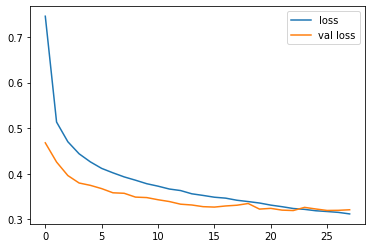

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'],label='loss')
plt.plot(hist.history['val_loss'],label='val loss')
plt.legend()
plt.show() #goodfit에 도달해서 멈춘것 확인

# CNN

In [ ]:
keras.layers.Conv2D(10,kernel_size=(3,3),activation='relu',padding='same',strides=1)

In [ ]:
keras.layers.MaxPooling2D(2) #2*2 size로 pooling 

In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [ ]:
(train_input,train_target),(test_input,test_target) = keras.datasets.fashion_mnist.load_data()


In [ ]:
train_rinput = train_input.reshape(-1,28,28,1)
test_rinput = test_input.reshape(-1,28,28,1)
train_rinput.shape

(60000, 28, 28, 1)

In [ ]:
train_scaled = train_rinput/255.0 #Min-Max 변환
test_scaled = test_rinput/255.0 #Min-Max 변환

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=3,activation='relu',padding='same',input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2))
model.add(keras.layers.Conv2D(16,kernel_size=3,activation='relu',padding='same'))
model.add(keras.layers.MaxPool2D(2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100,activation='relu')) #100이외 값 가능
model.add(keras.layers.Dropout(0.5)) #overfit줄이고 시간도 줄이고
model.add(keras.layers.Dense(10,activation='softmax')) 
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 16)        4624      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 100)              

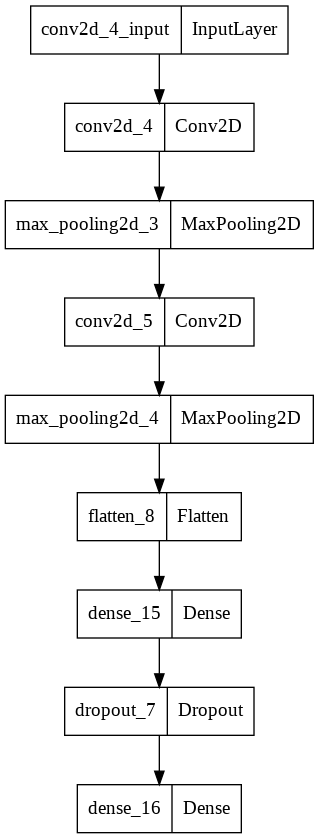

In [ ]:
keras.utils.plot_model(model)

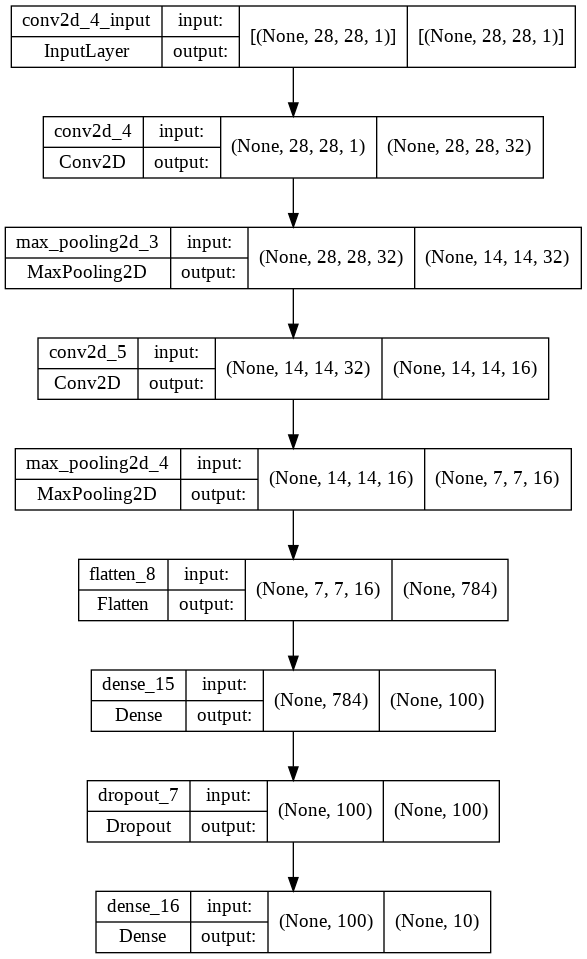

In [ ]:
keras.utils.plot_model(model,show_shapes=True)

In [ ]:
from gc import callbacks
model.compile(optimizer='adam',loss=keras.losses.sparse_categorical_crossentropy,metrics = 'accuracy')
early_stopping_cb= keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)
history = model.fit(train_scaled, train_target, validation_split=0.2,epochs=30000,callbacks=[early_stopping_cb])

Epoch 1/30000
1500/1500 [==============================] - 45s 30ms/step - loss: 0.5898 - accuracy: 0.7909 - val_loss: 0.3660 - val_accuracy: 0.8677
Epoch 2/30000
1500/1500 [==============================] - 44s 29ms/step - loss: 0.3991 - accuracy: 0.8577 - val_loss: 0.3116 - val_accuracy: 0.8835
Epoch 3/30000
1500/1500 [==============================] - 44s 30ms/step - loss: 0.3531 - accuracy: 0.8744 - val_loss: 0.2926 - val_accuracy: 0.8910
Epoch 4/30000
1500/1500 [==============================] - 44s 29ms/step - loss: 0.3210 - accuracy: 0.8844 - val_loss: 0.2718 - val_accuracy: 0.8988
Epoch 5/30000
1500/1500 [==============================] - 44s 29ms/step - loss: 0.2983 - accuracy: 0.8916 - val_loss: 0.2609 - val_accuracy: 0.9028
Epoch 6/30000
1500/1500 [==============================] - 44s 29ms/step - loss: 0.2823 - accuracy: 0.8974 - val_loss: 0.2646 - val_accuracy: 0.9030
Epoch 7/30000
1500/1500 [==============================] - 44s 29ms/step - loss: 0.2693 - accuracy: 0.9009

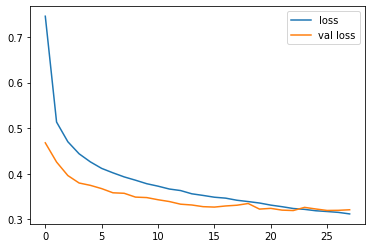

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'],label='loss')
plt.plot(hist.history['val_loss'],label='val loss')
plt.legend()
plt.show()

In [ ]:
model.evaluate(test_scaled,test_target)

313/313 [==============================] - 3s 9ms/step - loss: 0.2557 - accuracy: 0.9130


[0.25570762157440186, 0.9129999876022339]

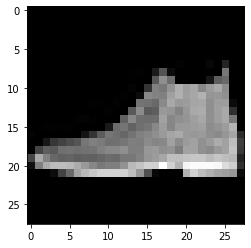

9


In [ ]:
plt.imshow(test_scaled[0].reshape(28,28),cmap='gray')
plt.show()
print(test_target[0])

In [ ]:
preds = model.predict(test_scaled[0:1]) #다차원구조에서 일차원이 추가
print(preds)

[[6.2346434e-12 1.4367137e-14 5.5123630e-14 1.6284930e-12 3.2767141e-16
  5.1028098e-07 3.0991298e-13 1.6632420e-06 1.4787161e-11 9.9999785e-01]]


In [ ]:
model.save('best-cnn-model.h5')

In [ ]:
model.layers

In [ ]:
conv = model.layers[0]
print(conv.weights[0].shape,conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [ ]:
print(conv.weights) #가중치 

In [ ]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(),conv_weights.std())

-0.06182362 0.40108606


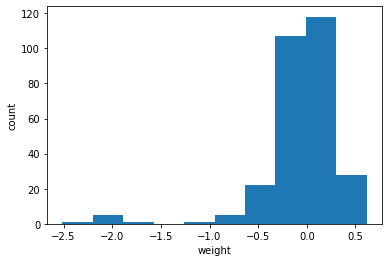

In [ ]:
plt.hist(conv_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show() #가중치 분포

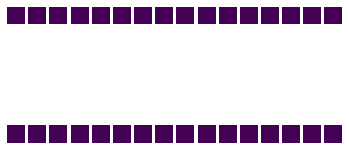

In [ ]:
#32개 그래프 영역 만들고 커널 출력
fig,axs = plt.subplots(2,16)
for i in range(2):
  for j in range(16):
    axs[i,j].imshow(conv_weights[:,:,0,i*16+j],vmin=0.5,vmax=0.5) # conv_weights:가중치 
    axs[i,j].axis('off')

plt.show()

In [ ]:
model2 = keras.Sequential()
model2.add(keras.layers.Conv2D(32,kernel_size=3,activation='relu',padding='same',input_shape=(28,28,1)))
model2.add(keras.layers.MaxPool2D(2))
model2.add(keras.layers.Conv2D(16,kernel_size=3,activation='relu',padding='same'))
model2.add(keras.layers.MaxPool2D(2))
model2.add(keras.layers.Flatten())
model2.add(keras.layers.Dense(100,activation='relu')) #100이외 값 가능
model2.add(keras.layers.Dropout(0.5)) #overfit줄이고 시간도 줄이고
model2.add(keras.layers.Dense(10,activation='softmax')) #100이외 값 가능
model2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 16)        4624      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_17 (Dense)            (None, 100)             

In [ ]:
conv2 = model2.layers[0]
conv_weights2  = conv2.weights[0].numpy()

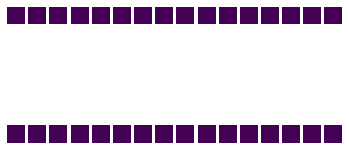

In [ ]:
fig,axs = plt.subplots(2,16)
for i in range(2):
  for j in range(16):
    axs[i,j].imshow(conv_weights2[:,:,0,i*16+j],vmin=0.5,vmax=0.5) # conv_weights:가중치 
    axs[i,j].axis('off')

plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
lr = LinearRegression()
lr.coef_ = np.random.uniform(0,1)
print(lr.coef_)

0.9433021858547679


In [ ]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_4_input'), name='conv2d_4_input', description="created by layer 'conv2d_4_input'")


In [ ]:
print(model.layers[0].output) # 특성 맵 : 32개

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 32), dtype=tf.float32, name=None), name='conv2d_4/Relu:0', description="created by layer 'conv2d_4'")


In [ ]:
conv_acti = keras.Model(model.input,model.layers[0].output)
print(conv_acti)

In [ ]:
train_input[0:1].shape

(1, 28, 28)

In [ ]:
inputs = train_input[0:1].reshape(-1,28,28,1)/255.0
inputs.shape

(1, 28, 28, 1)

In [ ]:
feature_maps = conv_acti.predict(inputs)

In [ ]:
print(feature_maps.shape)

(1, 28, 28, 32)


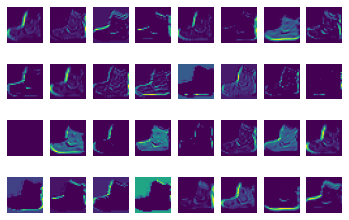

In [ ]:
fig,axs = plt.subplots(4,8)
for i in range(4):
  for j in range(8):
    axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
    axs[i,j].axis('off') #x축값생략
plt.show()

#보너스 강의 -OpenCV 맛

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
image = np.zeros((100,255,3),np.uint8)

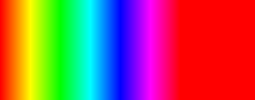

In [ ]:

for i in range(0, 180):
  image[:,i,0]=i
image[:,:,1]=255
image[:,:,2]=255
img = cv2.cvtColor(image, cv2.COLOR_HSV2BGR)
cv2_imshow(img)

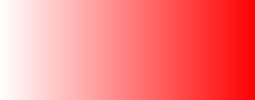

In [ ]:

image = np.zeros((100,255,3), np.uint8)
image[:,:,0] = 0
for i in range(0, 255):
  image[:,i,1]=i
image[:,:,2]=255
img = cv2.cvtColor(image, cv2.COLOR_HSV2BGR)
cv2_imshow(img)

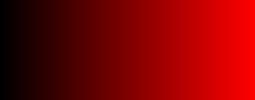

In [ ]:
image = np.zeros((100,255,3),np.uint8)
image[:,:,0]=0
for i in range(0,255):
  image[:,i,2]=i
image[:,:,1]=255
img = cv2.cvtColor(image,cv2.COLOR_HSV2BGR)
cv2_imshow(img) 

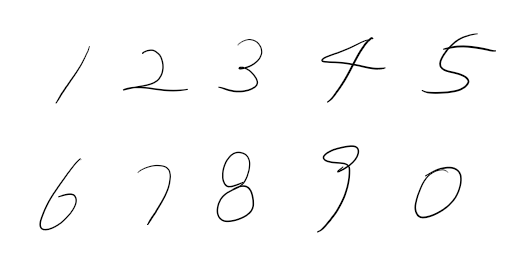

In [ ]:
path = '/content/KakaoTalk_20220518_141744196.png'
src_image = cv2.imread(path,cv2.IMREAD_COLOR)
cv2_imshow(src_image)

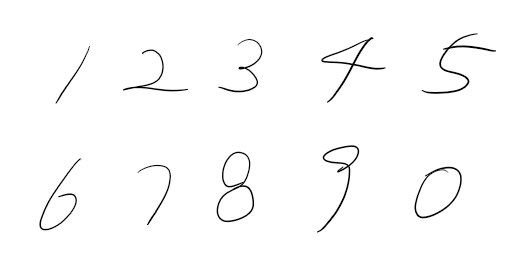

In [ ]:
cpy_image = src_image.copy()
gray_image = cv2.cvtColor(src_image,cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_image)

In [ ]:
src_image.shape, gray_image.shape

((259, 532, 3), (259, 532))

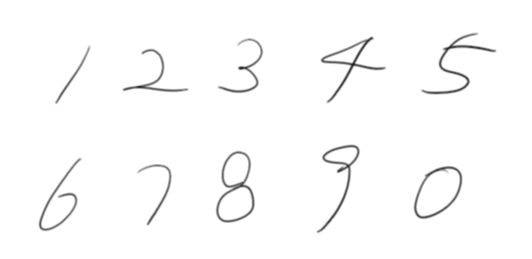

In [ ]:
blur_image = cv2.GaussianBlur(gray_image,(3,3),0) #3*3으로 넓어지는데 연해짐 gaussianblur
cv2_imshow(blur_image)

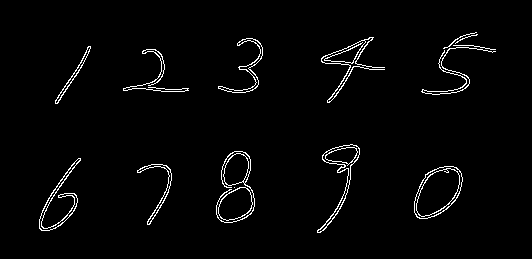

In [ ]:
#  블러 처리 - 글자 테두리 잡기 전에 하는 것
canny_image = cv2.Canny(blur_image,100,200)
cv2_imshow(canny_image)

In [ ]:
contours,_= cv2.findContours(canny_image,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE) #contour: 테두리

store_xywh=[]
for contour in contours:
  x,y,w,h = cv2.boundingRect(contour)
  flag = False
  if w>30 and h>=40:
    print(x,y,w,h) # 안쪽 곡선과 바깥쪽 곡선의 contour가 같아서 중복된게 나올 수 있음

414 166 49 53
414 166 49 53
416 168 44 49
416 168 44 49
137 164 35 61
137 164 35 61
39 158 42 73
39 158 42 73
216 151 39 72
317 144 43 89
317 144 43 89
123 49 66 43
421 47 75 48
55 46 36 58
55 46 36 58
218 38 45 55
218 38 45 55
321 37 64 66


In [ ]:
contours,_= cv2.findContours(canny_image,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

store_xywh=[]
for contour in contours:
  x,y,w,h = cv2.boundingRect(contour)
  flag = False
  if w>30 and h>=40:
    #print(x,y,w,h) # 안쪽 폐곡선과 바깥쪽 폐곡선의 contour가 같아서 중복된게 나올 수 있음
    for sv in store_xywh:
      gx = abs(sv[0]-x)
      gy = abs(sv[1]-y)
      if gx<5 and gy<5: 
        flag = True
        break
  else:
    flag = True
  if flag == False:
    store_xywh.append([x,y,w,h])

for sv in store_xywh:
  print(sv)

[414, 166, 49, 53]
[137, 164, 35, 61]
[39, 158, 42, 73]
[216, 151, 39, 72]
[317, 144, 43, 89]
[123, 49, 66, 43]
[421, 47, 75, 48]
[55, 46, 36, 58]
[218, 38, 45, 55]
[321, 37, 64, 66]


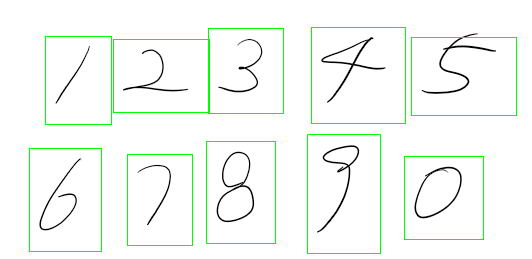

In [ ]:
for sv in store_xywh:
  x,y,w,h = sv
  cv2.rectangle(src_image,(x-10,y-10),(x+w+20,y+h+20),(0,255,0),1) #시작포인트, 길이(범위), 색, 라인두께 
cv2_imshow(src_image)

#손글씨

In [ ]:
(image_train,label_train),(image_test,label_test) = keras.datasets.mnist.load_data()
print(image_train.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)


In [ ]:
np.unique(label_train,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

In [ ]:
#구조 변경
image_train2 = image_train.reshape(-1,28*28)
image_test2 = image_test.reshape(-1,28*28)

In [ ]:
from sklearn import svm


In [ ]:
svm = svm. SVC() #svm의 분류 모델 생성
svm.fit(image_train2, label_train)

SVC()

In [ ]:
pval = svm.predict(image_test2)

In [ ]:
from sklearn import metrics
score = metrics.accuracy_score(pval,label_test)
print(score)

0.9792


In [ ]:
#수치형 데이터 -> 범주형 데이터(좀 더 디테일한 결과 줌)
from keras.utils import np_utils
label_train2 = np_utils.to_categorical(label_train)
print(label_train[0])
print(label_train2[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
label_test2 = np_utils.to_categorical(label_test)

In [ ]:
scaled_train = image_train /255.0 # 0~1 사이의 실수 나와야 하므로 
scaled_test = image_test/255.0

In [ ]:
from keras import layers,models
model = models.Sequential()

In [ ]:
from keras.backend import categorical_crossentropy
model.add(layers.Dense(100,activation='relu',input_shape=(784,)))
model.add(layers.Dense(28,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])
history = model.fit(image_train2,label_train2,epochs=15)

Epoch 1/15
1875/1875 [==============================] - 7s 3ms/step - loss: 1.9425 - accuracy: 0.2450
Epoch 2/15
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5679 - accuracy: 0.3497
Epoch 3/15
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4399 - accuracy: 0.3713
Epoch 4/15
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2764 - accuracy: 0.4494
Epoch 5/15
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2221 - accuracy: 0.4609
Epoch 6/15
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1674 - accuracy: 0.4734
Epoch 7/15
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1584 - accuracy: 0.4790
Epoch 8/15
1875/1875 [==============================] - 7s 4ms/step - loss: 1.1295 - accuracy: 0.4800
Epoch 9/15
1875/1875 [==============================] - 9s 5ms/step - loss: 1.1044 - accuracy: 0.4875
Epoch 10/15
1875/1875 [==============================] - 7s 4ms/step - loss: 1.091

In [ ]:
score = model.evaluate(image_test2,label_test2)
print(score)

313/313 [==============================] - 1s 2ms/step - loss: 1.0428 - accuracy: 0.4973
[1.0427898168563843, 0.49729999899864197]
